In [1]:
# Librería básica
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Lectura del archivo
df = pd.read_excel('C:\\Users\\Adrián Vázquez\\Documents\\Pruebas y ML (BEDU)\\Bases\\wage1.xls')
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

Estos son datos sobre el salario promedio mensual de 525 empleados; Su propósito es analizarlos para hacer una regresión lineal múltiple utilizando diferentes combinaciones de subconjuntos y aproximarnos al mejor modelo explicativo y predictivo

# Regresión Por Mínimos Cuadrados Ordinarios

## Análisis de la distribución de la variable dependiente

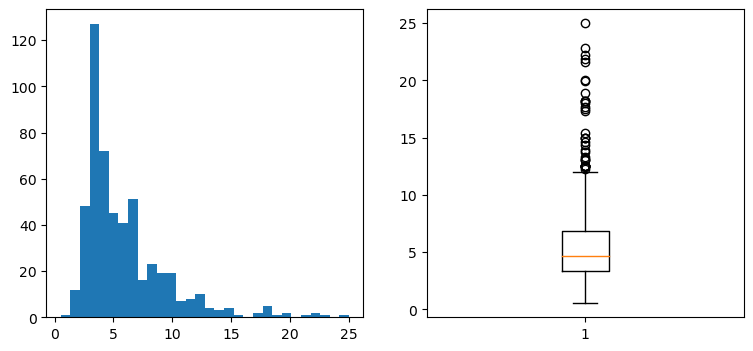

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
# Histograma 
wage = df[df.columns[0]]
axs[0].hist(wage, bins=30)
# Boxplot
axs[1].boxplot(wage)
plt.show()

El histograma muestra la distribución de la variable "lwage" la cual no sigue una distribución uniforme posiblemente por presencia de outliers, estos se pueden ver mejor en un box-plot

### Boxplot sin outliers

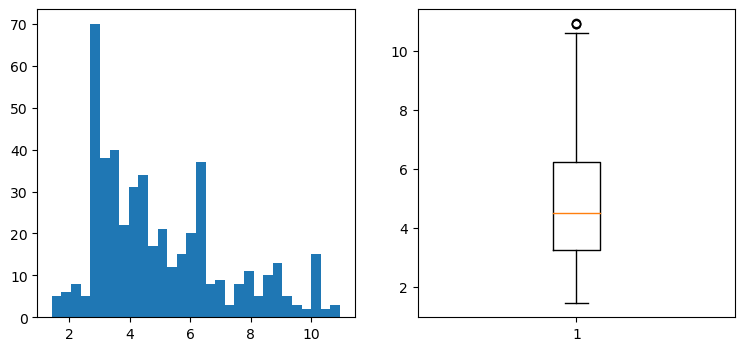

In [8]:
n = df[df['wage']<11]
n_df = n[n['wage']>1]
new_wage = n_df[n_df.columns[0]]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
# Histograma sin outliers 
wage = n_df[n_df.columns[0]]
axs[0].hist(new_wage, bins=30)
# Boxplot sin outliers
axs[1].boxplot(new_wage)
plt.show()

Al usar el logaritmo de los valores de la variable dependiente los datos están escalados, principalmente aquellos que son muy altos (outliers) así se puede trabajar en el modelo usando todo el conjunto de filas filtradas de la variable. Por lo tanto el modelo es más preciso

In [9]:
# Seleccion de variables para el análisis
X = n_df[['educ','exper','tenure','nonwhite','female','married']]
y = n_df['lwage']

In [10]:
# Convertir X (el conjunto de variables predictoras) en una constante x
x = sm.add_constant(X)
# Ajuste del modelo por Mínimos Cuadrádos Ordinarios
resultado=sm.OLS(y,x).fit()
# Obtención del resumen del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     32.43
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.04e-32
Time:                        23:13:48   Log-Likelihood:                -178.15
No. Observations:                 478   AIC:                             370.3
Df Residuals:                     471   BIC:                             399.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7852      0.093      8.416      0.000       0.602       0.969
educ           0.0574      0.007      8.749      0.000       0.044       0.070
exper          0.0014      0.001      0.942      0.347      -0.002       0.004
tenure         0.0105      0.003      3.671      0.000       0.005       0.016
nonwhite       0.0120      0.053      0.227      0.820      -0.092       0.116
female        -0.2289      0.033     -6.927      0.000      -0.294      -0.164
married        0.1321      0.036      3.714      0.000       0.062       0.202
==============================================================================
Omnibus:                        1.419   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.206
Skew:                           0.086   Prob(JB):                        0.547
Kurtosis:                       3.177   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al parecer la experiencia y el color de piel no son variables representativas del modelo por lo que no son útiles para explicar o predecir el comportamiento de la variable dependiente

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


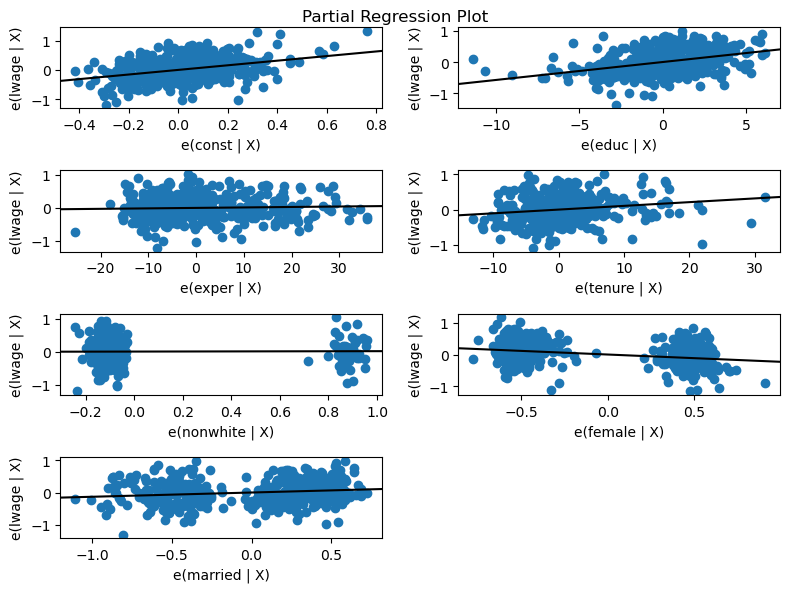

In [11]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(resultado, fig=fig)
plt.show()

El diagrama de regresión parcial ayuda a medir el efecto que tienen las variables sobre los resultados de la regresión en función de los residuos.

En este ejemplo:
* Podemos esperar que la educación sea representativa del modelo porque vemos que sus residuos presentan homocedasticidad con respecto de la variable dependiente

In [12]:
X1 = n_df[['educ','tenure','female','married']]
y1 = n_df['lwage']

In [13]:
# Modelo de regresión con el nuevo subconjunto
x = sm.add_constant(X1)
resultado=sm.OLS(y1,x).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     48.52
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           3.38e-34
Time:                        23:14:05   Log-Likelihood:                -178.63
No. Observations:                 478   AIC:                             367.3
Df Residuals:                     473   BIC:                             388.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8256      0.083      9.901      0.000       0.662       0.989
educ           0.0551      0.006      9.003      0.000       0.043       0.067
tenure         0.0117      0.003      4.548      0.000       0.007       0.017
female        -0.2263      0.033     -6.884      0.000      -0.291      -0.162
married        0.1413      0.034      4.169      0.000       0.075       0.208
==============================================================================
Omnibus:                        1.550   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.337
Skew:                           0.090   Prob(JB):                        0.513
Kurtosis:                       3.187   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con el ajuste, ahora todas las variables son representativas del modelo 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


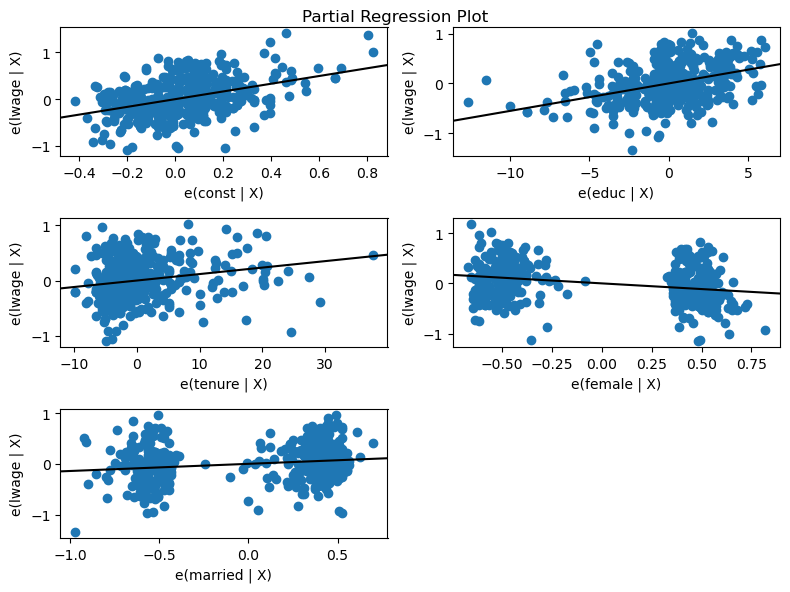

In [15]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(resultado, fig=fig)
plt.show()

Observamos el comportamiento de las variables

### Guardado e implementación del modelo

In [16]:
import joblib

# Guardado de modelo
filename = './modelo_reg.pkl'
joblib.dump(resultado, filename)

modelo_final = joblib.load(filename)

# Conjunto de características para cada nueva transacción "imaginaria" que no incluye la fecha de transacción
X_new = np.array([[9, 10, 0, 1],
                  [29, 9, 0, 1],
                  [30, 2, 1, 0],
                  [10, 41, 0, 1]])
# Uso del modelo con los nuevos datos
x_new = sm.add_constant(X_new)
results = modelo_final.predict(x_new)
print('Predicciones')
for prediction in results:
    print(round(prediction, 2))

Predicciones
1.58
2.67
2.28
2.0


In [18]:
# Tabla de predicciones con la diferencia entre los datos reales y los predichos por el modelo
ypred = resultado.predict(x)
pred = pd.DataFrame({'Predicted': np.exp(ypred),
                     'Real': np.exp(y1),
                     'Differ': np.exp(ypred) - np.exp(y)})
# Estadísticas de la tabla de predicciones 
pred.describe()

,Predicted,Real,Differ
count,478.000000,478.000000,478.000000
mean,4.707415,5.009875,-0.302459
std,1.069933,2.150263,1.825473
min,2.047804,1.430000,-6.451390
25%,4.002327,3.250000,-1.296247
50%,4.522656,4.499998,0.144951
75%,5.368807,6.250003,0.927572
max,8.541131,10.949995,4.502608


Text(0.5, 1.0, 'Predicciones vs. Real')

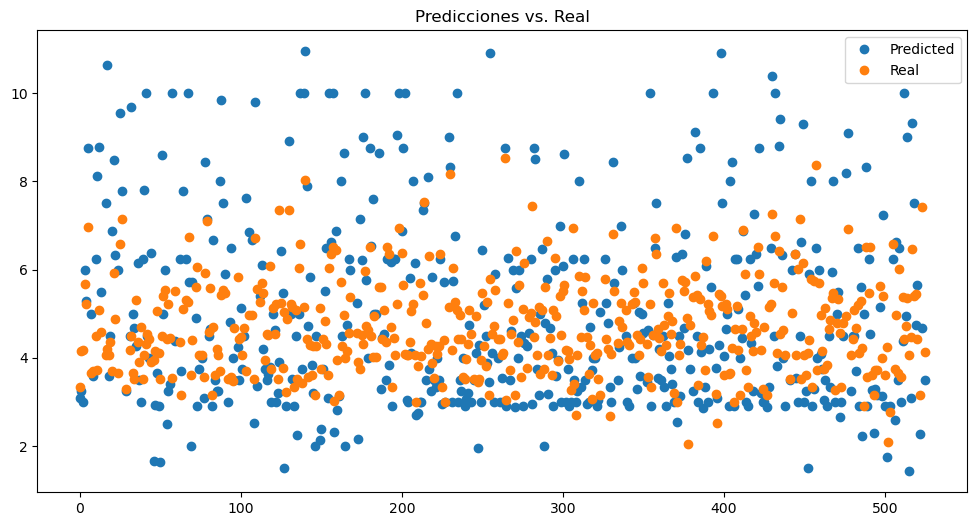

In [19]:
# Gráfico comparativo
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.exp(y1), "o", label="Predicted")
ax.plot(np.exp(ypred), "o", label="Real")
ax.legend(loc="best")
ax.set_title('Predicciones vs. Real')

## Conclusión

Son claras las diferencias una vez vistas en el gráfico, si observamos la tabla descriptiva de las predicciones vs. los datos reales y las diferencias, el rango de error de los datos se ubica entre -6.45 y 4.50, eso suma incertidumbre a nuestro modelo; Otra observación es el R^2, esta métrica es de .291 lo cual indica que el modelo tiene una probabilidad de 29.1% de que pueda predecir correctamente la variable dependiente dadas las demás variables y sus características

Una forma de resolver estos y otros problemas es extendiendo el análisis, por ejemplo realizando un Análisis de Componentes Principales para detectar las combinaciones de predictores que puedan explicar a la variable dependiente. Otra solución común sería estudiar la naturaleza de los datos, saber si otra muestra tiene las mismas características o si se comporta diferente, incluso añadir filas de datos podría ser una solución a la deficiente capacidad predictora de este modelo